In [3]:
pip install nfl_data_py

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.1 MB/s eta 0:00:00
  Created wheel for nfl_data_py: filename=nfl_data_py-0.3.1-py3-none-any.whl size=13187 sha256=9ff712607fd956f6de766aaac2ae58ccdf7d77d39c003892219f183d42bf854f
  Stored in directory: /root/.cache/pip/wheels/ca/2e/d2/4def312ac7c070e1c0002e91ecc6923481a86c3ebd5b2c5413
Successfully built nfl_data_py


In [2]:
import pandas as pd
import nfl_data_py as nfl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
# Create dataframe of play by play data using nfl_data_py
pbp = pd.concat([nfl.import_pbp_data([season], downcast=True) for season in range(2000, 2024)])
pbp.head()

2000 done.
Downcasting floats.
2001 done.
Downcasting floats.
2002 done.
Downcasting floats.
2003 done.
Downcasting floats.
2004 done.
Downcasting floats.
2005 done.
Downcasting floats.
2006 done.
Downcasting floats.
2007 done.
Downcasting floats.
2008 done.
Downcasting floats.
2009 done.
Downcasting floats.
2010 done.
Downcasting floats.
2011 done.
Downcasting floats.
2012 done.
Downcasting floats.
2013 done.
Downcasting floats.
2014 done.
Downcasting floats.
2015 done.
Downcasting floats.
2016 done.
Downcasting floats.
2017 done.
Downcasting floats.
2018 done.
Downcasting floats.
2019 done.
Downcasting floats.
2020 done.
Downcasting floats.
2021 done.
Downcasting floats.
2022 done.
Downcasting floats.
2023 done.
Downcasting floats.


,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_players,defense_players,n_offense,n_defense,ngs_air_yards,time_to_throw,was_pressure,route,defense_man_zone_type,defense_coverage_type
0,34.0,2000_01_ARI_NYG,2000090300,NYG,ARI,REG,1,ARI,away,NYG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,70.0,2000_01_ARI_NYG,2000090300,NYG,ARI,REG,1,ARI,away,NYG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,106.0,2000_01_ARI_NYG,2000090300,NYG,ARI,REG,1,ARI,away,NYG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,131.0,2000_01_ARI_NYG,2000090300,NYG,ARI,REG,1,ARI,away,NYG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,148.0,2000_01_ARI_NYG,2000090300,NYG,ARI,REG,1,ARI,away,NYG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Dataframe to csv for saving
pbp.to_csv('pbp_data.csv', index=False)

In [ ]:
# Create Dataframe from csv
pbp = pd.read_csv('pbp_data.csv')
pbp.head()

<ipython-input-3-2c7e10feef49>:2: DtypeWarning: Columns (36,37,45,179,180,182,183,189,190,193,194,197,198,203,204,205,206,207,208,209,210,211,212,213,214,218,219,220,222,224,226,233,234,235,236,237,238,243,244,245,248,249,253,254,255,260,262,263,266,267,268,269,283,284,292,293,294,295,296,299,301,302,303,306,332,372,373,374,375,377,379,380,381,386,387,388,389) have mixed types. Specify dtype option on import or set low_memory=False.
  pbp = pd.read_csv('pbp_data.csv')


In [3]:
# Dataframe of current season play by play
# curr = nfl.import_pbp_data([2023], downcast=True)
# curr

2023 done.
Downcasting floats.


,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_players,defense_players,n_offense,n_defense,ngs_air_yards,time_to_throw,was_pressure,route,defense_man_zone_type,defense_coverage_type
0,1.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,None,None,None,...,,,0.0,0.0,NaN,NaN,None,None,None,None
1,39.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,00-0035150;00-0037330;00-0036896;00-0033251;00...,00-0036403;00-0038635;00-0036614;00-0039149;00...,11.0,11.0,NaN,NaN,None,None,None,None
2,55.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,00-0037746;00-0031095;00-0036334;00-0034445;00...,00-0035705;00-0035636;00-0036933;00-0036896;00...,11.0,11.0,NaN,NaN,None,None,None,None
3,77.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,00-0037746;00-0031095;00-0036334;00-0034445;00...,00-0035705;00-0035636;00-0036933;00-0034375;00...,11.0,11.0,4.53,2.169,False,HITCH,ZONE_COVERAGE,COVER_3
4,102.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,00-0031095;00-0036334;00-0034445;00-0031260;00...,00-0035705;00-0035636;00-0036933;00-0034375;00...,11.0,11.0,NaN,NaN,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47394,3540.0,2023_18_TB_CAR,2022121702,CAR,TB,REG,18,TB,away,CAR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47395,3562.0,2023_18_TB_CAR,2022121702,CAR,TB,REG,18,TB,away,CAR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47396,3593.0,2023_18_TB_CAR,2022121702,CAR,TB,REG,18,TB,away,CAR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47397,3615.0,2023_18_TB_CAR,2022121702,CAR,TB,REG,18,TB,away,CAR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Add current season to previous data
# pbp = pd.concat([pbp, curr])
# pbp.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_formation,offense_personnel,defenders_in_box,defense_personnel,number_of_pass_rushers,players_on_play,offense_players,defense_players,n_offense,n_defense
0,34.00,2000_01_ARI_NYG,2000090300,NYG,ARI,REG,1,ARI,away,NYG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,70.00,2000_01_ARI_NYG,2000090300,NYG,ARI,REG,1,ARI,away,NYG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,106.00,2000_01_ARI_NYG,2000090300,NYG,ARI,REG,1,ARI,away,NYG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,131.00,2000_01_ARI_NYG,2000090300,NYG,ARI,REG,1,ARI,away,NYG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,148.00,2000_01_ARI_NYG,2000090300,NYG,ARI,REG,1,ARI,away,NYG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Compute average EPA for rushing and passing for offense and defense for each game
rush_off_epa = pbp.loc[pbp['rush_attempt'] == 1].groupby(['posteam', 'season', 'week'], as_index=False)['epa'].mean()
rush_def_epa = pbp.loc[pbp['rush_attempt'] == 1].groupby(['defteam', 'season', 'week'], as_index=False)['epa'].mean()
pass_off_epa = pbp.loc[pbp['pass_attempt'] == 1].groupby(['posteam', 'season', 'week'], as_index=False)['epa'].mean()
pass_def_epa = pbp.loc[pbp['pass_attempt'] == 1].groupby(['defteam', 'season', 'week'], as_index=False)['epa'].mean()
rush_off_epa

,posteam,season,week,epa
0,ARI,2000,1,-0.345669
1,ARI,2000,2,-0.276743
2,ARI,2000,4,-0.334533
3,ARI,2000,5,-0.016838
4,ARI,2000,6,-0.038473
...,...,...,...,...
12859,WAS,2023,13,0.118076
12860,WAS,2023,15,-0.248925
12861,WAS,2023,16,0.270150
12862,WAS,2023,17,0.125432


In [9]:
# Shift epa values by one game to predict next one
rush_off_epa['epa_shifted'] = rush_off_epa['epa'].shift()
pass_off_epa['epa_shifted'] = pass_off_epa['epa'].shift()
rush_def_epa['epa_shifted'] = rush_def_epa['epa'].shift()
pass_def_epa['epa_shifted'] = pass_def_epa['epa'].shift()
rush_off_epa.head()


,posteam,season,week,epa,epa_shifted
0,ARI,2000,1,-0.345669,NaN
1,ARI,2000,2,-0.276743,-0.345669
2,ARI,2000,4,-0.334533,-0.276743
3,ARI,2000,5,-0.016838,-0.334533
4,ARI,2000,6,-0.038473,-0.016838


In [10]:
# Exponentially weighted EPA's
rush_off_epa['ewma'] = rush_off_epa['epa_shifted'].ewm(min_periods=1, span=10).mean()
pass_off_epa['ewma'] = pass_off_epa['epa_shifted'].ewm(min_periods=1, span=10).mean()
rush_def_epa['ewma'] = rush_def_epa['epa_shifted'].ewm(min_periods=1, span=10).mean()
pass_def_epa['ewma'] = pass_def_epa['epa_shifted'].ewm(min_periods=1, span=10).mean()
pass_def_epa

,defteam,season,week,epa,epa_shifted,ewma
0,ARI,2000,1,-0.009200,NaN,NaN
1,ARI,2000,2,0.283460,-0.009200,-0.009200
2,ARI,2000,4,0.500345,0.283460,0.151763
3,ARI,2000,5,0.058499,0.500345,0.291891
4,ARI,2000,6,-0.063633,0.058499,0.214999
...,...,...,...,...,...,...
12859,WAS,2023,13,0.744556,0.583189,0.193230
12860,WAS,2023,15,0.090042,0.744556,0.293471
12861,WAS,2023,16,-0.325978,0.090042,0.256484
12862,WAS,2023,17,0.370420,-0.325978,0.150582


In [11]:
# Define dynamically shifting window so that more games are accounted for as the season continues
def dynamic_window(x):
    values = np.zeros(len(x))
    for i, (index, row) in enumerate(x.iterrows()):
        epa = x.epa_shifted.iloc[:i+1]
        if row.week > 10:
            values[i] = epa.ewm(min_periods=1, span=row.week).mean().values[-1]
        else:
            values[i] = epa.ewm(min_periods=1, span=10).mean().values[-1]

    return pd.Series(values, index=x.index)



In [12]:
# Compute dynamically shifted EPA's
rush_off_epa['ewma_dynamic'] = rush_off_epa.groupby('posteam').apply(dynamic_window).values
pass_off_epa['ewma_dynamic'] = pass_off_epa.groupby('posteam').apply(dynamic_window).values
rush_def_epa['ewma_dynamic'] = rush_def_epa.groupby('defteam').apply(dynamic_window).values
pass_def_epa['ewma_dynamic'] = pass_def_epa.groupby('defteam').apply(dynamic_window).values
rush_off_epa

,posteam,season,week,epa,epa_shifted,ewma,ewma_dynamic
0,ARI,2000,1,-0.345669,NaN,NaN,NaN
1,ARI,2000,2,-0.276743,-0.345669,-0.345669,-0.345669
2,ARI,2000,4,-0.334533,-0.276743,-0.307759,-0.307759
3,ARI,2000,5,-0.016838,-0.334533,-0.318522,-0.318522
4,ARI,2000,6,-0.038473,-0.016838,-0.219131,-0.219131
...,...,...,...,...,...,...,...
12859,WAS,2023,13,0.118076,-0.172794,-0.085561,-0.076909
12860,WAS,2023,15,-0.248925,0.118076,-0.048536,-0.048704
12861,WAS,2023,16,0.270150,-0.248925,-0.084970,-0.072028
12862,WAS,2023,17,0.125432,0.270150,-0.020403,-0.032612


In [13]:
# Combine EPA into offense and defense
off_epa = rush_off_epa.merge(pass_off_epa, on=['posteam', 'season', 'week'], suffixes=['_rush', '_pass']).rename(columns={'posteam': 'team'})
def_epa = rush_def_epa.merge(pass_def_epa, on=['defteam', 'season', 'week'], suffixes=['_rush', '_pass']).rename(columns={'defteam': 'team'})
off_epa

,team,season,week,epa_rush,epa_shifted_rush,ewma_rush,ewma_dynamic_rush,epa_pass,epa_shifted_pass,ewma_pass,ewma_dynamic_pass
0,ARI,2000,1,-0.345669,NaN,NaN,NaN,0.019830,-0.560680,-0.560680,-0.560680
1,ARI,2000,2,-0.276743,-0.345669,-0.345669,-0.345669,0.558977,0.019830,-0.241399,-0.241399
2,ARI,2000,4,-0.334533,-0.276743,-0.307759,-0.307759,-0.264054,0.558977,0.080347,0.080347
3,ARI,2000,5,-0.016838,-0.334533,-0.318522,-0.318522,0.049141,-0.264054,-0.033118,-0.033118
4,ARI,2000,6,-0.038473,-0.016838,-0.219131,-0.219131,0.101830,0.049141,-0.009504,-0.009504
...,...,...,...,...,...,...,...,...,...,...,...
12859,WAS,2023,13,0.118076,-0.172794,-0.085561,-0.076909,-0.482269,-0.257268,-0.101118,-0.101474
12860,WAS,2023,15,-0.248925,0.118076,-0.048536,-0.048704,-0.085142,-0.482269,-0.170418,-0.149791
12861,WAS,2023,16,0.270150,-0.248925,-0.084970,-0.072028,-0.459513,-0.085142,-0.154914,-0.140048
12862,WAS,2023,17,0.125432,0.270150,-0.020403,-0.032612,-0.332157,-0.459513,-0.210295,-0.174228


In [14]:
# Combine offense and defense into one table
epa = off_epa.merge(def_epa, on=['team', 'season', 'week'], suffixes=['_off', '_def'])
epa.head()

,team,season,week,epa_rush_off,epa_shifted_rush_off,ewma_rush_off,ewma_dynamic_rush_off,epa_pass_off,epa_shifted_pass_off,ewma_pass_off,ewma_dynamic_pass_off,epa_rush_def,epa_shifted_rush_def,ewma_rush_def,ewma_dynamic_rush_def,epa_pass_def,epa_shifted_pass_def,ewma_pass_def,ewma_dynamic_pass_def
0,ARI,2000,1,-0.345669,NaN,NaN,NaN,0.019830,-0.560680,-0.560680,-0.560680,0.166199,NaN,NaN,NaN,-0.009200,NaN,NaN,NaN
1,ARI,2000,2,-0.276743,-0.345669,-0.345669,-0.345669,0.558977,0.019830,-0.241399,-0.241399,-0.065981,0.166199,0.166199,0.166199,0.283460,-0.009200,-0.009200,-0.009200
2,ARI,2000,4,-0.334533,-0.276743,-0.307759,-0.307759,-0.264054,0.558977,0.080347,0.080347,-0.018524,-0.065981,0.038500,0.038500,0.500345,0.283460,0.151763,0.151763
3,ARI,2000,5,-0.016838,-0.334533,-0.318522,-0.318522,0.049141,-0.264054,-0.033118,-0.033118,0.004625,-0.018524,0.015577,0.015577,0.058499,0.500345,0.291891,0.291891
4,ARI,2000,6,-0.038473,-0.016838,-0.219131,-0.219131,0.101830,0.049141,-0.009504,-0.009504,0.086308,0.004625,0.011969,0.011969,-0.063633,0.058499,0.214999,0.214999


In [15]:
# Compute average EPA by week
means = epa.groupby(['season', 'week'], as_index=False)[[column for column in epa.columns if 'dynamic' in column]].mean()
means['avg_epa'] = means[[column for column in epa.columns if 'dynamic' in column]].mean(axis=1)
means = means[['season', 'week', 'avg_epa']]
means

,season,week,avg_epa
0,2000,1,-0.058076
1,2000,2,-0.067157
2,2000,3,-0.043209
3,2000,4,-0.049227
4,2000,5,-0.045210
...,...,...,...
498,2023,14,-0.039169
499,2023,15,-0.043857
500,2023,16,-0.046165
501,2023,17,-0.043967


In [16]:
epa = epa.merge(means, on = ['season', 'week'])
epa

,team,season,week,epa_rush_off,epa_shifted_rush_off,ewma_rush_off,ewma_dynamic_rush_off,epa_pass_off,epa_shifted_pass_off,ewma_pass_off,ewma_dynamic_pass_off,epa_rush_def,epa_shifted_rush_def,ewma_rush_def,ewma_dynamic_rush_def,epa_pass_def,epa_shifted_pass_def,ewma_pass_def,ewma_dynamic_pass_def,avg_epa
0,ARI,2000,1,-0.345669,NaN,NaN,NaN,0.019830,-0.560680,-0.560680,-0.560680,0.166199,NaN,NaN,NaN,-0.009200,NaN,NaN,NaN,-0.058076
1,ATL,2000,1,-0.363727,0.035566,0.068197,0.035566,0.329638,0.474114,-0.019998,0.474114,-0.041899,-0.025188,-0.007782,-0.025188,0.125751,0.231305,0.234700,0.231305,-0.058076
2,BAL,2000,1,-0.022581,-0.591611,-0.167626,-0.591611,0.087666,-0.091766,-0.053773,-0.091766,-0.499352,-0.018852,-0.115980,-0.018852,-0.216112,0.458766,0.054958,0.458766,-0.058076
3,BUF,2000,1,-0.288235,-0.455446,-0.074116,-0.455446,-0.135394,-0.146071,0.223894,-0.146071,-0.241708,-0.066856,-0.054154,-0.066856,-0.387886,-0.104618,-0.166560,-0.104618,-0.058076
4,CAR,2000,1,-0.017835,0.045016,0.027951,0.045016,-0.100068,0.095996,0.082214,0.095996,-0.006129,0.100900,0.029131,0.100900,0.147979,-0.006425,-0.151129,-0.006425,-0.058076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12859,SEA,2014,21,0.088337,0.157183,0.010415,0.011998,0.226393,-0.166031,0.097471,0.102665,-0.231904,-0.106377,-0.182744,-0.183931,0.334324,-0.273597,-0.234510,-0.183773,-0.024550
12860,NE,2017,21,0.058719,-0.266479,-0.045873,-0.049933,0.379339,0.115744,0.164189,0.198810,0.196937,-0.093841,-0.058792,-0.045496,0.499033,0.195600,0.018059,0.005570,-0.014195
12861,PHI,2017,21,0.196937,-0.062614,-0.120549,-0.097057,0.499033,0.702384,0.158496,0.127611,0.058719,-0.058109,-0.137192,-0.127519,0.379339,-0.220417,-0.159710,-0.125550,-0.014195
12862,PIT,2005,21,0.110020,-0.123824,-0.049172,-0.057547,-0.054930,0.752312,0.344600,0.241239,0.164945,0.226269,-0.038966,-0.074808,-0.082010,-0.328769,-0.091204,-0.072982,0.006443


In [17]:
# Drop first week of data
epa = epa.loc[epa['season'] != epa['season'].unique()[0], :]
epa = epa.reset_index(drop=True)
epa.head()

,team,season,week,epa_rush_off,epa_shifted_rush_off,ewma_rush_off,ewma_dynamic_rush_off,epa_pass_off,epa_shifted_pass_off,ewma_pass_off,ewma_dynamic_pass_off,epa_rush_def,epa_shifted_rush_def,ewma_rush_def,ewma_dynamic_rush_def,epa_pass_def,epa_shifted_pass_def,ewma_pass_def,ewma_dynamic_pass_def,avg_epa
0,ARI,2001,2,-0.228353,-0.048532,-0.224168,-0.224168,0.108686,-0.715064,-0.234108,-0.234108,0.001074,0.024131,0.042308,0.042308,0.419153,-0.196194,0.085527,0.085527,-0.080221
1,ATL,2001,2,-0.130927,0.103782,-0.093744,-0.098438,0.919700,-0.228843,-0.257655,-0.261202,0.068162,-0.130169,-0.065116,-0.066814,0.252806,0.142591,0.079539,0.075214,-0.080221
2,BAL,2001,2,-0.362641,-0.647642,-0.236878,-0.238880,-0.276097,0.493910,-0.006449,-0.005973,-0.127129,-0.331880,-0.318681,-0.320899,-0.106041,-0.188780,-0.348094,-0.351931,-0.080221
3,BUF,2001,2,0.088352,-0.138749,-0.088823,-0.092216,0.105837,-0.512002,-0.014323,-0.025256,0.108893,-0.189240,-0.080746,-0.081750,0.461351,0.227580,-0.023079,-0.017714,-0.080221
4,CAR,2001,2,0.068162,-0.224760,-0.206606,-0.213008,0.252806,0.102058,-0.093008,-0.097785,-0.130927,-0.027202,-0.043012,-0.044571,0.919700,-0.276173,0.040017,0.046212,-0.080221


In [ ]:
# # Perform same operations for Completion Percentage over Expected
# cpoe = pbp.loc[pbp['cpoe'].notna() != 0, :].groupby(['posteam', 'season', 'week'], as_index=False)['cpoe'].mean()
# cpoe['cpoe_shifted'] = cpoe['cpoe'].shift()
# cpoe['cpoe_ewma'] = cpoe['cpoe_shifted'].ewm(min_periods=1, span=10).mean()
# #cpoe['cpoe_dynamic'] = cpoe.apply(dynamic_window).values
# cpoe = cpoe.rename(columns={'posteam': 'team'})
# cpoe = cpoe.loc[cpoe['season'] != cpoe['season'].unique()[0], :]
# cpoe


,team,season,week,cpoe,cpoe_shifted,cpoe_ewma
16,ARI,2007,1,-8.87,8.46,0.33
17,ARI,2007,2,-2.14,-8.87,-1.40
18,ARI,2007,3,-0.57,-2.14,-1.54
19,ARI,2007,4,0.77,-0.57,-1.36
20,ARI,2007,5,-2.14,0.77,-0.96
...,...,...,...,...,...,...
9496,WAS,2023,8,8.42,-3.22,2.12
9497,WAS,2023,9,1.74,8.42,3.27
9498,WAS,2023,10,-2.82,1.74,2.99
9499,WAS,2023,11,4.62,-2.82,1.93


In [ ]:
# # Merge cpoe
# stats = epa.merge(cpoe, on=['team', 'season', 'week'])
# stats.head()

,team,season,week,epa_rush_off,epa_shifted_rush_off,ewma_rush_off,ewma_dynamic_rush_off,epa_pass_off,epa_shifted_pass_off,ewma_pass_off,...,ewma_rush_def,ewma_dynamic_rush_def,epa_pass_def,epa_shifted_pass_def,ewma_pass_def,ewma_dynamic_pass_def,avg_epa,cpoe,cpoe_shifted,cpoe_ewma
0,ARI,2007,1,0.00,0.15,-0.11,-0.11,-0.19,0.34,0.14,...,-0.11,-0.11,-0.39,0.17,0.06,0.06,-0.06,-8.87,8.46,0.33
1,ATL,2007,1,-0.18,0.03,0.00,0.00,-0.34,-0.08,-0.14,...,-0.14,-0.14,-0.05,0.39,0.06,0.06,-0.06,4.91,12.68,-1.03
2,BAL,2007,1,-0.08,-0.06,-0.14,-0.14,-0.60,-0.50,0.02,...,-0.28,-0.28,-0.06,-0.08,-0.19,-0.19,-0.06,2.06,1.78,2.98
3,BUF,2007,1,0.13,-0.53,-0.19,-0.19,-0.34,-0.26,0.02,...,-0.01,-0.01,0.20,0.05,-0.07,-0.07,-0.06,3.86,-1.60,3.69
4,CAR,2007,1,-0.03,-0.14,-0.12,-0.12,0.34,0.43,-0.08,...,-0.06,-0.06,-0.17,-0.25,-0.05,-0.05,-0.06,2.57,18.04,3.23


In [18]:
stats = epa
stats.head()

,team,season,week,epa_rush_off,epa_shifted_rush_off,ewma_rush_off,ewma_dynamic_rush_off,epa_pass_off,epa_shifted_pass_off,ewma_pass_off,ewma_dynamic_pass_off,epa_rush_def,epa_shifted_rush_def,ewma_rush_def,ewma_dynamic_rush_def,epa_pass_def,epa_shifted_pass_def,ewma_pass_def,ewma_dynamic_pass_def,avg_epa
0,ARI,2001,2,-0.228353,-0.048532,-0.224168,-0.224168,0.108686,-0.715064,-0.234108,-0.234108,0.001074,0.024131,0.042308,0.042308,0.419153,-0.196194,0.085527,0.085527,-0.080221
1,ATL,2001,2,-0.130927,0.103782,-0.093744,-0.098438,0.919700,-0.228843,-0.257655,-0.261202,0.068162,-0.130169,-0.065116,-0.066814,0.252806,0.142591,0.079539,0.075214,-0.080221
2,BAL,2001,2,-0.362641,-0.647642,-0.236878,-0.238880,-0.276097,0.493910,-0.006449,-0.005973,-0.127129,-0.331880,-0.318681,-0.320899,-0.106041,-0.188780,-0.348094,-0.351931,-0.080221
3,BUF,2001,2,0.088352,-0.138749,-0.088823,-0.092216,0.105837,-0.512002,-0.014323,-0.025256,0.108893,-0.189240,-0.080746,-0.081750,0.461351,0.227580,-0.023079,-0.017714,-0.080221
4,CAR,2001,2,0.068162,-0.224760,-0.206606,-0.213008,0.252806,0.102058,-0.093008,-0.097785,-0.130927,-0.027202,-0.043012,-0.044571,0.919700,-0.276173,0.040017,0.046212,-0.080221


In [19]:
# Create table of game results
games = pbp[['season', 'week', 'home_team', 'away_team', 'home_score', 'away_score']].drop_duplicates().reset_index(drop=True)
games['pnt_diff'] = abs(games['home_score'] - games['away_score'])
games['total'] = games['home_score'] + games['away_score']
games.head()

,season,week,home_team,away_team,home_score,away_score,pnt_diff,total
0,2000,1,NYG,ARI,21,16,5,37
1,2000,1,PIT,BAL,0,16,16,16
2,2000,1,WAS,CAR,20,17,3,37
3,2000,1,MIN,CHI,30,27,3,57
4,2000,1,LA,DEN,41,36,5,77


In [20]:
# Create binary label for win/loss
games['home_team_win'] = np.where(games['home_score'] > games['away_score'], 1, 0)
games.head()

,season,week,home_team,away_team,home_score,away_score,pnt_diff,total,home_team_win
0,2000,1,NYG,ARI,21,16,5,37,1
1,2000,1,PIT,BAL,0,16,16,16,0
2,2000,1,WAS,CAR,20,17,3,37,1
3,2000,1,MIN,CHI,30,27,3,57,1
4,2000,1,LA,DEN,41,36,5,77,1


In [21]:
# Create tables for home and away teams
home = games.merge(stats.rename(columns={'team': 'home_team'}), on=['season', 'week', 'home_team'])
away = games.merge(stats.rename(columns={'team': 'away_team'}), on=['season', 'week', 'away_team'])
home.head()

,season,week,home_team,away_team,home_score,away_score,pnt_diff,total,home_team_win,epa_rush_off,...,ewma_dynamic_pass_off,epa_rush_def,epa_shifted_rush_def,ewma_rush_def,ewma_dynamic_rush_def,epa_pass_def,epa_shifted_pass_def,ewma_pass_def,ewma_dynamic_pass_def,avg_epa
0,2001,1,SF,ATL,16,13,3,29,1,-0.130169,...,0.151909,0.103782,0.159221,0.063330,0.063590,-0.228843,0.214325,-0.019579,-0.024423,-0.077651
1,2001,1,MIN,CAR,13,24,11,37,0,-0.027202,...,0.028128,-0.224760,-0.118231,-0.062405,-0.059783,0.102058,0.652552,0.289387,0.292185,-0.077651
2,2001,1,BAL,CHI,17,6,11,23,1,-0.647642,...,-0.118725,-0.331880,-0.261678,-0.315748,-0.318422,-0.188780,-0.729425,-0.383497,-0.388730,-0.077651
3,2001,1,GB,DET,28,6,22,34,1,-0.066412,...,0.023123,-0.394468,-0.170657,-0.052246,-0.047049,-0.244624,-0.080437,-0.023390,-0.026653,-0.077651
4,2001,1,NYJ,IND,24,45,21,69,0,-0.324286,...,-0.105669,0.215279,-0.241942,-0.122515,-0.127706,0.378574,-0.545937,-0.257618,-0.266693,-0.077651


In [24]:
# Merge home and away tables into one
final = home.merge(away, on=['season', 'week', 'home_team', 'away_team', 'home_score', 'away_score', 'home_team_win'], suffixes=('_home', '_away'))
final.head()

,season,week,home_team,away_team,home_score,away_score,pnt_diff_home,total_home,home_team_win,epa_rush_off_home,...,ewma_dynamic_pass_off_away,epa_rush_def_away,epa_shifted_rush_def_away,ewma_rush_def_away,ewma_dynamic_rush_def_away,epa_pass_def_away,epa_shifted_pass_def_away,ewma_pass_def_away,ewma_dynamic_pass_def_away,avg_epa_away
0,2001,1,SF,ATL,16,13,3,29,1,-0.130169,...,-0.268638,-0.130169,0.114757,-0.050660,-0.052255,0.142591,-0.157054,0.065528,0.059730,-0.077651
1,2001,1,MIN,CAR,13,24,11,37,0,-0.027202,...,-0.143710,-0.027202,-0.039270,-0.046526,-0.048563,-0.276173,0.749650,0.110281,0.120297,-0.077651
2,2001,1,BAL,CHI,17,6,11,23,1,-0.647642,...,-0.089877,-0.647642,-0.000300,-0.104013,-0.105335,0.493910,-0.369786,-0.028286,-0.031610,-0.077651
3,2001,1,GB,DET,28,6,22,34,1,-0.066412,...,-0.246906,-0.066412,-0.236856,-0.085455,-0.082859,0.381501,0.234168,-0.104433,-0.107946,-0.077651
4,2001,1,NYJ,IND,24,45,21,69,0,-0.324286,...,0.180657,-0.324286,0.205160,0.028641,0.035479,0.073507,-0.184207,-0.081640,-0.082769,-0.077651


#Predict 2022 Outcomes


In [25]:
# Create features for Logistic Regression
features = [column for column in final.columns if 'dynamic' in column]
# features.extend(['cpoe_shifted_home', 'cpoe_shifted_away'])



final = final.dropna()

X = final.loc[final['season'] != 2023, features].values
y = final.loc[final['season'] != 2023, 'home_team_win'].values

clf = LogisticRegression()
clf.fit(X,y)

LogisticRegression()

In [26]:
# Accuracy of Model using cross validation
accuracy_scores = cross_val_score(clf, X, y, cv=10)
log_losses = cross_val_score(clf, X, y, cv=10, scoring='neg_log_loss')

print('Model Accuracy:', np.mean(accuracy_scores))

Model Accuracy: 0.6323989790358199


In [27]:
# Compute cross entropy loss
print('Neg log loss:', np.mean(log_losses))

Neg log loss: -0.6389329295887107


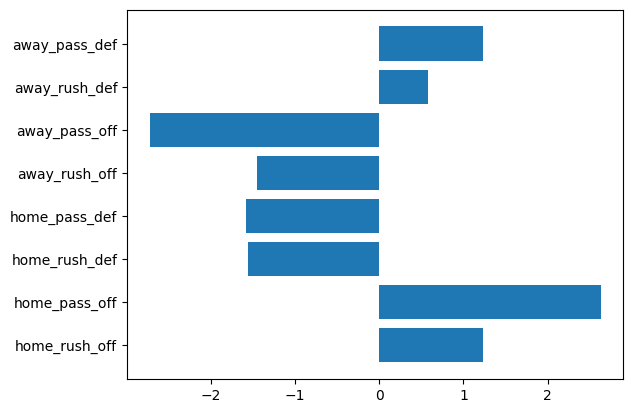

In [28]:
importance = clf.coef_
plt.barh(np.arange(len(features)), importance[0])
plt.yticks(np.arange(len(features)), ['home_rush_off', 'home_pass_off', 'home_rush_def',
                                      'home_pass_def', 'away_rush_off', 'away_pass_off',
                                      'away_rush_def', 'away_pass_def'])
plt.show()


In [29]:
# Compute Results for entire 2022 Season and display top 10 predictions
df_2022 = final.loc[(final['season'] == 2022)].assign(
    predicted_winner = lambda x: clf.predict(x[features].values),
    home_team_win_probability = lambda x: clf.predict_proba(x[features].values)[:, 1]
)\
[['home_team', 'away_team', 'week', 'predicted_winner', 'home_team_win_probability', 'home_team_win']]

df_2022['actual_winner'] = df_2022.apply(lambda x: x.home_team if x.home_team_win else x.away_team, axis=1)
df_2022['predicted_winner'] = df_2022.apply(lambda x: x.home_team if x.predicted_winner == 1 else x.away_team, axis=1)
df_2022['win_probability'] = df_2022.apply(lambda x: x.home_team_win_probability if x.predicted_winner == x.home_team else 1 - x.home_team_win_probability, axis=1)
df_2022['correct_prediction'] = (df_2022['predicted_winner'] == df_2022['actual_winner']).astype(int)

df_2022 = df_2022.drop(columns=['home_team_win_probability', 'home_team_win'])

df_2022.sort_values(by='win_probability', ascending=False).reset_index(drop=True).head(10)

,home_team,away_team,week,predicted_winner,actual_winner,win_probability,correct_prediction
0,TEN,NYG,1,TEN,NYG,0.901176,0
1,DAL,HOU,14,DAL,DAL,0.871198,1
2,GB,NYG,5,GB,NYG,0.821139,0
3,BUF,PIT,5,BUF,BUF,0.816194,1
4,MIA,HOU,12,MIA,MIA,0.801694,1
5,DAL,IND,13,DAL,DAL,0.801513,1
6,KC,DEN,17,KC,KC,0.800085,1
7,SF,ARI,18,SF,SF,0.793639,1
8,NYG,DAL,3,DAL,DAL,0.787557,1
9,KC,LA,12,KC,KC,0.785915,1


In [30]:
# 2023 Accuracy
df_2022['correct_prediction'].value_counts()[1]/len(df_2022['correct_prediction'])

0.6514084507042254

Text(0, 0.5, 'Accuracy of Prediction')

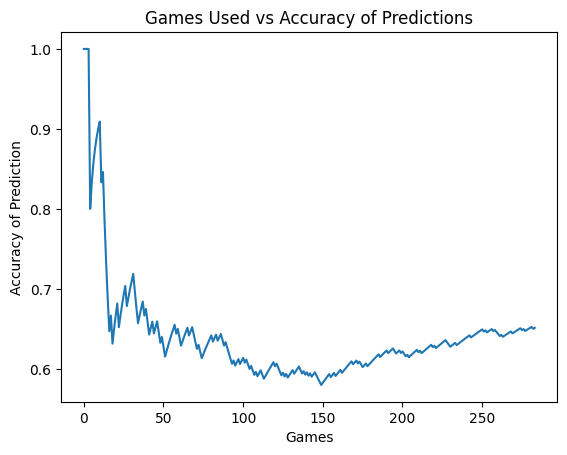

In [31]:
# Accuracy of model throughout 2022 Season
acc = []
for i in range(1, len(df_2022['correct_prediction']) + 1):
    val = df_2022['correct_prediction'].iloc[:i].value_counts()[1]/(i)
    acc.append(val)

plt.plot(range(len(range(1, len(df_2022['correct_prediction']) + 1))), acc)
plt.title('Games Used vs Accuracy of Predictions')
plt.xlabel('Games')
plt.ylabel('Accuracy of Prediction')

Text(0, 0.5, 'Accuracy')

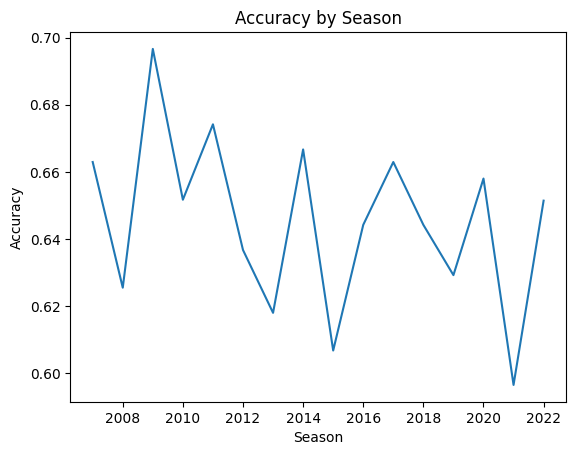

In [32]:
# Accuracy of model by season
accs = []
for i in range(2007, 2023):
    df = final.loc[(final['season'] == i)].assign(
        predicted_winner = lambda x: clf.predict(x[features].values),
        home_team_win_probability = lambda x: clf.predict_proba(x[features].values)[:, 1]
    )\
    [['home_team', 'away_team', 'week', 'predicted_winner', 'home_team_win_probability', 'home_team_win']]

    df['actual_winner'] = df.apply(lambda x: x.home_team if x.home_team_win else x.away_team, axis=1)
    df['predicted_winner'] = df.apply(lambda x: x.home_team if x.predicted_winner == 1 else x.away_team, axis=1)
    df['correct_prediction'] = (df['predicted_winner'] == df['actual_winner']).astype(int)

    accs.append(df['correct_prediction'].value_counts()[1]/len(df['correct_prediction']))


plt.plot(range(2007, 2023), accs)
plt.title('Accuracy by Season')
plt.xlabel('Season')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Confidence')

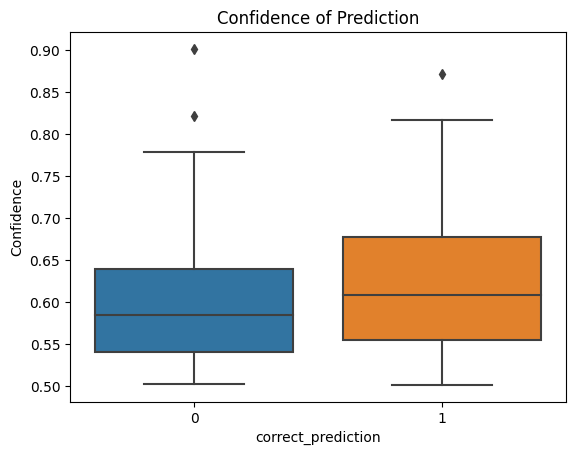

In [33]:
# Comparing correct and incorrect predictions by initial confidence of prediction
sns.boxplot(y = 'win_probability', x  = 'correct_prediction', data = df_2022)
plt.title('Confidence of Prediction')
plt.ylabel('Confidence')

Text(0, 0.5, 'Confidence')

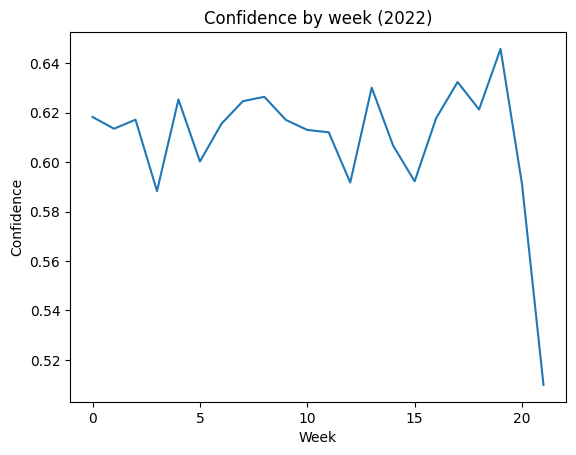

In [34]:
# Chance of winning by week
plt.plot(range(df_2022['week'].nunique()), df_2022.groupby('week')['win_probability'].mean())
plt.title('Confidence by week (2022)')
plt.xlabel('Week')
plt.ylabel('Confidence')

# Seasonal Accuracy by Years of Data

3
3
5
10


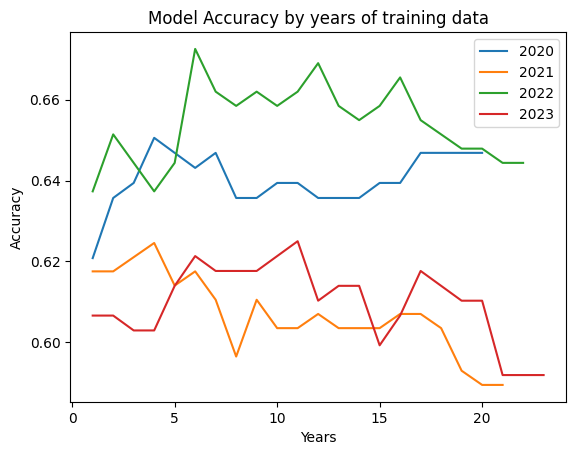

In [35]:
for j in range(2020, 2024):
    accs = []
    for i in range(0, j - 2000):
        years = [*range((j-1)-i, j)]

        X = final.loc[final['season'].isin(years), features].values
        y = final.loc[final['season'].isin(years), 'home_team_win'].values
        clf = LogisticRegression()
        clf.fit(X,y)

        df = final.loc[(final['season'] == j)].assign(
        predicted_winner = lambda x: clf.predict(x[features].values),
        )\
        [['home_team', 'away_team', 'week', 'predicted_winner', 'home_team_win']]

        df['actual_winner'] = df.apply(lambda x: x.home_team if x.home_team_win else x.away_team, axis=1)
        df['predicted_winner'] = df.apply(lambda x: x.home_team if x.predicted_winner == 1 else x.away_team, axis=1)
        df['correct_prediction'] = (df['predicted_winner'] == df['actual_winner']).astype(int)

        accs.append(df['correct_prediction'].value_counts()[1]/len(df['correct_prediction']))


    plt.plot(range(1, j - 1999), accs)
    plt.title('Model Accuracy by years of training data')
    plt.xlabel('Years')
    plt.ylabel('Accuracy')
    plt.legend([*range(2020, 2024)])
    print(accs.index(max(accs)))

Text(0, 0.5, 'Accuracy')

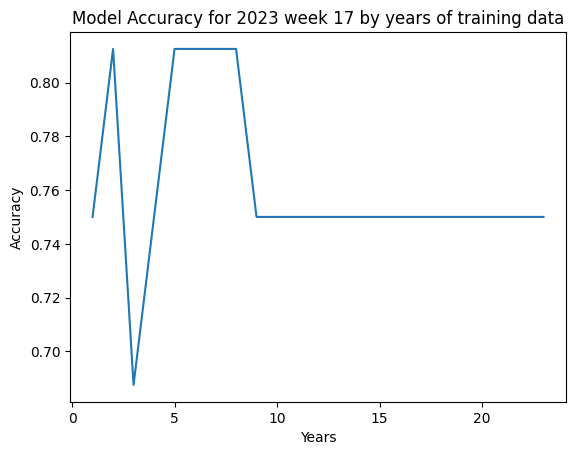

In [37]:
# 2023 week 17 predictions by years of data
wk17_X = final.loc[(final['season'] == 2023) & (final['week'] < 17), features].values
wk17_y = final.loc[(final['season'] == 2023) & (final['week'] < 17), 'home_team_win'].values

accs = []
for i in range(1, 24):
    years = [*range(2023-i, 2023)]

    X = final.loc[final['season'].isin(years), features].values
    X = np.concatenate((X, wk17_X))
    y = final.loc[final['season'].isin(years), 'home_team_win'].values
    y = np.concatenate((y, wk17_y))
    clf = LogisticRegression()
    clf.fit(X,y)

    df = final.loc[(final['season'] == 2023) & (final['week'] == 17)].assign(
    predicted_winner = lambda x: clf.predict(x[features].values),
    )\
    [['home_team', 'away_team', 'week', 'predicted_winner', 'home_team_win']]

    df['actual_winner'] = df.apply(lambda x: x.home_team if x.home_team_win else x.away_team, axis=1)
    df['predicted_winner'] = df.apply(lambda x: x.home_team if x.predicted_winner == 1 else x.away_team, axis=1)
    df['correct_prediction'] = (df['predicted_winner'] == df['actual_winner']).astype(int)

    accs.append(df['correct_prediction'].value_counts()[1]/len(df['correct_prediction']))


plt.plot(range(1, 24), accs)
plt.title('Model Accuracy for 2023 week 17 by years of training data')
plt.xlabel('Years')
plt.ylabel('Accuracy')


Text(0, 0.5, 'Accuracy')

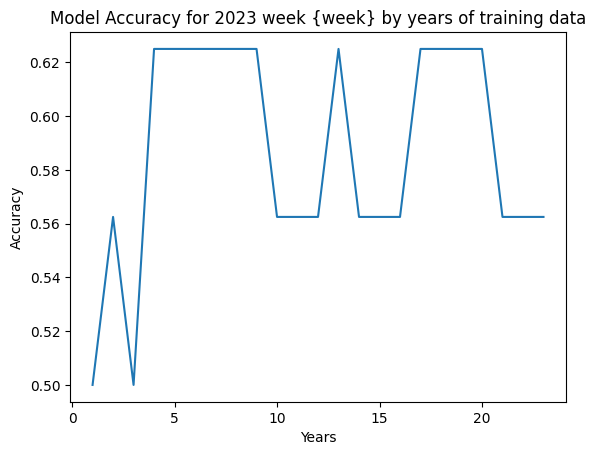

In [38]:
week = 16
wk17_X = final.loc[(final['season'] == 2023) & (final['week'] < week), features].values
wk17_y = final.loc[(final['season'] == 2023) & (final['week'] < week), 'home_team_win'].values

accs = []
for i in range(1, 24):
    years = [*range(2023-i, 2023)]

    X = final.loc[final['season'].isin(years), features].values
    X = np.concatenate((X, wk17_X))
    y = final.loc[final['season'].isin(years), 'home_team_win'].values
    y = np.concatenate((y, wk17_y))
    clf = LogisticRegression()
    clf.fit(X,y)

    df = final.loc[(final['season'] == 2023) & (final['week'] == week)].assign(
    predicted_winner = lambda x: clf.predict(x[features].values),
    )\
    [['home_team', 'away_team', 'week', 'predicted_winner', 'home_team_win']]

    df['actual_winner'] = df.apply(lambda x: x.home_team if x.home_team_win else x.away_team, axis=1)
    df['predicted_winner'] = df.apply(lambda x: x.home_team if x.predicted_winner == 1 else x.away_team, axis=1)
    df['correct_prediction'] = (df['predicted_winner'] == df['actual_winner']).astype(int)

    accs.append(df['correct_prediction'].value_counts()[1]/len(df['correct_prediction']))


plt.plot(range(1, 24), accs)
plt.title('Model Accuracy for 2023 week {week} by years of training data')
plt.xlabel('Years')
plt.ylabel('Accuracy')

# Total Point Prediction

In [ ]:
# X = final[features]
# y = final['total_home']
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1234)

In [ ]:
# reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
# models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# print(models)

# Week 17 Prediction

In [39]:
features = [column for column in final.columns if 'dynamic' in column]
# features.extend(['cpoe_shifted_home', 'cpoe_shifted_away'])

train_data = final


X = train_data.loc[(train_data['season'] >= 2023 - 10), features].values
y = train_data.loc[(train_data['season'] >= 2023 - 10), 'home_team_win'].values

clf2 = LogisticRegression(max_iter=100)
clf2.fit(X,y)

LogisticRegression()

In [ ]:
# bye_teams = ['BAL', 'BUF', 'CHI', 'LV', 'MIN', 'NYG']
# bye_stats = stats.loc[(stats['week'] == 12) & (stats['team'].isin(bye_teams)) & (stats['season'] == 2023)]
# bye_stats

,team,season,week,epa_rush_off,epa_shifted_rush_off,ewma_rush_off,ewma_dynamic_rush_off,epa_pass_off,epa_shifted_pass_off,ewma_pass_off,ewma_dynamic_pass_off,epa_rush_def,epa_shifted_rush_def,ewma_rush_def,ewma_dynamic_rush_def,epa_pass_def,epa_shifted_pass_def,ewma_pass_def,ewma_dynamic_pass_def,avg_epa
11104,BAL,2023,12,0.07,0.06,0.04,0.04,-0.10,0.28,0.06,0.05,-0.02,0.24,-0.02,-0.03,-0.42,-0.07,-0.17,-0.17,-0.04
11105,BUF,2023,12,0.18,-0.21,0.06,0.06,0.15,0.36,0.10,0.10,0.07,-0.12,-0.11,-0.11,0.00,-0.50,-0.05,-0.05,-0.04
11107,CHI,2023,12,-0.17,0.01,0.05,0.05,-0.14,0.03,-0.15,-0.17,-0.14,0.17,-0.13,-0.13,-0.70,-0.03,0.06,0.08,-0.04
11120,LV,2023,12,-0.22,-0.34,-0.18,-0.17,0.10,-0.22,-0.15,-0.14,-0.04,-0.27,-0.08,-0.07,0.36,0.02,-0.09,-0.08,-0.04
11122,MIN,2023,12,-0.14,-0.07,-0.09,-0.10,-0.70,0.03,0.09,0.08,-0.17,-0.38,-0.15,-0.14,-0.14,0.04,-0.05,-0.04,-0.04
11125,NYG,2023,12,-0.53,-0.27,-0.14,-0.12,-0.06,0.11,-0.25,-0.24,0.17,0.05,0.01,0.01,-0.44,-0.30,-0.02,-0.01,-0.04


In [40]:
prev_stats = stats.loc[(stats['week'] == 16) & (stats['season'] == 2023)]
# prev_stats = pd.concat([wk13_stats, bye_stats])
# prev_stats = wk13_stats
prev_stats.rename(columns={'week': 'prev_week'}, inplace=True)
prev_stats

<ipython-input-40-cacc6aa684fe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prev_stats.rename(columns={'week': 'prev_week'}, inplace=True)


,team,season,prev_week,epa_rush_off,epa_shifted_rush_off,ewma_rush_off,ewma_dynamic_rush_off,epa_pass_off,epa_shifted_pass_off,ewma_pass_off,ewma_dynamic_pass_off,epa_rush_def,epa_shifted_rush_def,ewma_rush_def,ewma_dynamic_rush_def,epa_pass_def,epa_shifted_pass_def,ewma_pass_def,ewma_dynamic_pass_def,avg_epa
11192,ARI,2023,16,-0.142591,0.254388,0.081228,0.048261,-0.163948,-0.171050,-0.241165,-0.235227,0.293010,0.036708,-0.046255,-0.040422,-0.129322,0.650386,0.235785,0.187321,-0.046165
11193,ATL,2023,16,0.018427,-0.588938,-0.167875,-0.133163,0.224771,0.156028,-0.047252,-0.058476,-0.319683,-0.289614,-0.162400,-0.141381,-0.188033,-0.143848,-0.051822,-0.020562,-0.046165
11194,BAL,2023,16,-0.038902,0.127785,0.049428,0.040209,0.132982,-0.132039,0.035407,0.028061,0.174988,-0.096102,-0.020178,-0.041529,-0.374346,-0.275824,-0.177205,-0.159122,-0.046165
11195,BUF,2023,16,-0.215064,0.245417,0.106904,0.094245,0.456059,-0.028812,0.060219,0.081234,-0.188278,0.354033,0.043385,-0.001319,-0.028550,-0.336460,-0.114712,-0.090159,-0.046165
11196,CAR,2023,16,-0.026983,-0.289614,-0.064419,-0.061976,0.286278,-0.143848,-0.290649,-0.252411,0.152282,-0.588938,-0.107644,-0.075489,0.389066,0.156028,-0.035437,-0.024169,-0.046165
11197,CHI,2023,16,0.293010,-0.233395,-0.039297,-0.007849,-0.129322,-0.360000,-0.159232,-0.171782,-0.142591,-0.526988,-0.202064,-0.164463,-0.163948,-0.312815,-0.131951,-0.049051,-0.046165
11198,CIN,2023,16,-0.335800,0.006429,-0.039828,-0.044713,-0.164918,0.169973,0.109742,0.088963,0.148395,-0.063549,-0.043261,-0.037674,0.297684,0.306671,0.140836,0.100223,-0.046165
11199,CLE,2023,16,-0.220644,-0.526988,-0.145429,-0.106900,0.343313,-0.312815,-0.198159,-0.181205,-0.232924,-0.233395,-0.114397,-0.101107,-0.253436,-0.360000,-0.196306,-0.192376,-0.046165
11200,DAL,2023,16,-0.193047,0.354033,0.088532,0.046129,0.234236,-0.336460,0.103339,0.117146,-0.232534,0.245417,-0.055933,-0.078540,0.191957,-0.028812,-0.091588,-0.099489,-0.046165
11201,DEN,2023,16,-0.105968,-0.193896,-0.098395,-0.079387,-0.077755,-0.070382,-0.098984,-0.097659,-0.336859,0.210434,-0.056292,-0.054497,0.090864,0.423104,-0.017529,0.004850,-0.046165


In [60]:
# 2023 Schedule
sched = nfl.import_schedules([2023])
sched[['away_team', 'home_team']] = sched[['away_team', 'home_team']].astype(str)
sched.head()

,game_id,season,game_type,week,gameday,weekday,gametime,away_team,away_score,home_team,...,wind,away_qb_id,home_qb_id,away_qb_name,home_qb_name,away_coach,home_coach,referee,stadium_id,stadium
6421,2023_01_DET_KC,2023,REG,1,2023-09-07,Thursday,20:20,DET,21.0,KC,...,NaN,00-0033106,00-0033873,Jared Goff,Patrick Mahomes,Dan Campbell,Andy Reid,John Hussey,KAN00,GEHA Field at Arrowhead Stadium
6422,2023_01_CAR_ATL,2023,REG,1,2023-09-10,Sunday,13:00,CAR,10.0,ATL,...,NaN,00-0039150,00-0038122,Bryce Young,Desmond Ridder,Frank Reich,Arthur Smith,Brad Rogers,ATL97,Mercedes-Benz Stadium
6423,2023_01_HOU_BAL,2023,REG,1,2023-09-10,Sunday,13:00,HOU,9.0,BAL,...,NaN,00-0039163,00-0034796,C.J. Stroud,Lamar Jackson,DeMeco Ryans,John Harbaugh,Tra Blake,BAL00,M&T Bank Stadium
6424,2023_01_CIN_CLE,2023,REG,1,2023-09-10,Sunday,13:00,CIN,3.0,CLE,...,NaN,00-0036442,00-0033537,Joe Burrow,Deshaun Watson,Zac Taylor,Kevin Stefanski,Clete Blakeman,CLE00,FirstEnergy Stadium
6425,2023_01_JAX_IND,2023,REG,1,2023-09-10,Sunday,13:00,JAX,31.0,IND,...,NaN,00-0036971,00-0039164,Trevor Lawrence,Anthony Richardson,Doug Pederson,Shane Steichen,Clay Martin,IND00,Lucas Oil Stadium


# 2023 Week 17 Prediction

In [76]:
wk = sched.loc[sched['week'] == 17][['season', 'week', 'home_team', 'away_team', 'result']]
wk

,season,week,home_team,away_team,result
6661,2023,17,CLE,NYJ,17.0
6662,2023,17,DAL,DET,1.0
6663,2023,17,BAL,MIA,37.0
6664,2023,17,BUF,NE,6.0
6665,2023,17,CHI,ATL,20.0
6666,2023,17,HOU,TEN,23.0
6667,2023,17,IND,LV,3.0
6668,2023,17,JAX,CAR,26.0
6669,2023,17,NYG,LA,-1.0
6670,2023,17,PHI,ARI,-4.0


In [77]:
home_pred = wk.merge(prev_stats.rename(columns={'team': 'home_team'}), on=['home_team'])
away_pred = wk.merge(prev_stats.rename(columns={'team': 'away_team'}), on=['away_team'])
home_pred

,season_x,week,home_team,away_team,result,season_y,prev_week,epa_rush_off,epa_shifted_rush_off,ewma_rush_off,...,ewma_dynamic_pass_off,epa_rush_def,epa_shifted_rush_def,ewma_rush_def,ewma_dynamic_rush_def,epa_pass_def,epa_shifted_pass_def,ewma_pass_def,ewma_dynamic_pass_def,avg_epa
0,2023,17,CLE,NYJ,17.0,2023,16,-0.220644,-0.526988,-0.145429,...,-0.181205,-0.232924,-0.233395,-0.114397,-0.101107,-0.253436,-0.360000,-0.196306,-0.192376,-0.046165
1,2023,17,DAL,DET,1.0,2023,16,-0.193047,0.354033,0.088532,...,0.117146,-0.232534,0.245417,-0.055933,-0.078540,0.191957,-0.028812,-0.091588,-0.099489,-0.046165
2,2023,17,BAL,MIA,37.0,2023,16,-0.038902,0.127785,0.049428,...,0.028061,0.174988,-0.096102,-0.020178,-0.041529,-0.374346,-0.275824,-0.177205,-0.159122,-0.046165
3,2023,17,BUF,NE,6.0,2023,16,-0.215064,0.245417,0.106904,...,0.081234,-0.188278,0.354033,0.043385,-0.001319,-0.028550,-0.336460,-0.114712,-0.090159,-0.046165
4,2023,17,CHI,ATL,20.0,2023,16,0.293010,-0.233395,-0.039297,...,-0.171782,-0.142591,-0.526988,-0.202064,-0.164463,-0.163948,-0.312815,-0.131951,-0.049051,-0.046165
5,2023,17,HOU,TEN,23.0,2023,16,-0.232924,-0.163366,-0.120160,...,-0.046600,-0.220644,-0.190962,-0.138347,-0.113567,0.343313,-0.173652,-0.034910,-0.026539,-0.046165
6,2023,17,IND,LV,3.0,2023,16,-0.319683,0.093928,-0.059162,...,-0.025622,0.018427,-0.383085,-0.046814,-0.043068,0.224771,-0.269454,-0.062957,-0.048853,-0.046165
7,2023,17,JAX,CAR,26.0,2023,16,-0.085442,-0.096102,-0.128910,...,-0.001048,-0.368722,0.127785,0.014127,-0.013185,0.349813,-0.132039,0.000241,0.006950,-0.046165
8,2023,17,NYG,LA,-1.0,2023,16,0.083173,-0.220110,-0.201013,...,-0.169489,0.064196,-0.161654,-0.019030,0.001954,0.189328,0.311621,-0.007776,-0.009244,-0.046165
9,2023,17,PHI,ARI,-4.0,2023,16,0.064196,0.162425,-0.041404,...,0.074158,0.083173,0.003257,0.047281,0.020000,-0.185850,0.093299,0.102361,0.061239,-0.046165


In [78]:
final_pred = home_pred.merge(away_pred, on=['season_x', 'week', 'home_team', 'away_team'], suffixes=('_home', '_away'))
final_pred

,season_x,week,home_team,away_team,result_home,season_y_home,prev_week_home,epa_rush_off_home,epa_shifted_rush_off_home,ewma_rush_off_home,...,ewma_dynamic_pass_off_away,epa_rush_def_away,epa_shifted_rush_def_away,ewma_rush_def_away,ewma_dynamic_rush_def_away,epa_pass_def_away,epa_shifted_pass_def_away,ewma_pass_def_away,ewma_dynamic_pass_def_away,avg_epa_away
0,2023,17,CLE,NYJ,17.0,2023,16,-0.220644,-0.526988,-0.145429,...,-0.256899,0.270150,-0.057654,-0.111459,-0.094853,-0.459513,0.252873,-0.129485,-0.120921,-0.046165
1,2023,17,DAL,DET,1.0,2023,16,-0.193047,0.354033,0.088532,...,0.126585,-0.395588,-0.193896,-0.115834,-0.094204,0.142283,-0.070382,0.049515,0.038630,-0.046165
2,2023,17,BAL,MIA,37.0,2023,16,-0.038902,0.127785,0.049428,...,0.141977,-0.193047,-0.656687,-0.198813,-0.152287,0.234236,-0.541177,-0.197153,-0.150758,-0.046165
3,2023,17,BUF,NE,6.0,2023,16,-0.215064,0.245417,0.106904,...,-0.206435,-0.105968,-0.473931,-0.302962,-0.256806,-0.077755,0.078408,0.007659,0.015024,-0.046165
4,2023,17,CHI,ATL,20.0,2023,16,0.293010,-0.233395,-0.039297,...,-0.058476,-0.319683,-0.289614,-0.162400,-0.141381,-0.188033,-0.143848,-0.051822,-0.020562,-0.046165
5,2023,17,HOU,TEN,23.0,2023,16,-0.232924,-0.163366,-0.120160,...,-0.035154,-0.165596,-0.163366,-0.080543,-0.096965,0.283389,-0.067926,0.033622,0.056038,-0.046165
6,2023,17,IND,LV,3.0,2023,16,-0.319683,0.093928,-0.059162,...,-0.096302,-0.266148,-0.474848,-0.145551,-0.104569,-0.242696,-0.294871,-0.103915,-0.068154,-0.046165
7,2023,17,JAX,CAR,26.0,2023,16,-0.085442,-0.096102,-0.128910,...,-0.252411,0.152282,-0.588938,-0.107644,-0.075489,0.389066,0.156028,-0.035437,-0.024169,-0.046165
8,2023,17,NYG,LA,-1.0,2023,16,0.083173,-0.220110,-0.201013,...,0.006820,-0.300343,-0.248925,-0.031525,-0.027332,0.040899,-0.085142,-0.008146,-0.002839,-0.046165
9,2023,17,PHI,ARI,-4.0,2023,16,0.064196,0.162425,-0.041404,...,-0.235227,0.293010,0.036708,-0.046255,-0.040422,-0.129322,0.650386,0.235785,0.187321,-0.046165


In [85]:
# Compute Results for the week
df_week = final_pred.assign(
    predicted_winner = lambda x: clf2.predict(x[features].values),
    home_team_win_probability = lambda x: clf2.predict_proba(x[features].values)[:, 1]
)\
[['home_team', 'away_team', 'week', 'predicted_winner', 'home_team_win_probability', 'result_home']]

df_week['predicted_winner'] = df_week.apply(lambda x: x.home_team if x.predicted_winner == 1 else x.away_team, axis=1)
df_week['win_probability'] = df_week.apply(lambda x: x.home_team_win_probability if x.predicted_winner == x.home_team else 1 - x.home_team_win_probability, axis=1)

df_week = df_week.drop(columns=['home_team_win_probability'])
df_week['result_home'] = np.where(df_week['result_home'] > 0, df_week['home_team'], df_week['away_team'])
df_week.rename(columns={"result_home": "winner"}, inplace=True)

df_week.sort_values(by='win_probability', ascending=False).reset_index(drop=True)

,home_team,away_team,week,predicted_winner,winner,win_probability
0,WAS,SF,17,SF,SF,0.853633
1,BUF,NE,17,BUF,BUF,0.785269
2,PHI,ARI,17,PHI,ARI,0.728217
3,CLE,NYJ,17,CLE,CLE,0.727306
4,JAX,CAR,17,JAX,JAX,0.681622
5,DAL,DET,17,DAL,DAL,0.628745
6,KC,CIN,17,KC,KC,0.621229
7,IND,LV,17,IND,IND,0.620025
8,NYG,LA,17,LA,LA,0.610979
9,HOU,TEN,17,HOU,HOU,0.587966
